<a href="https://colab.research.google.com/github/Rafaeltafolla/MachineLearning/blob/main/KNN_M_L_July_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split

#New

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
#solo modelos de clasificacion
from sklearn.metrics import classification_report #reporte para modelos de clasificacion, nos ahorramos modelo de confusion
from sklearn.metrics import accuracy_score


In [ ]:
bills=pd.read_csv("https://gist.githubusercontent.com/javierIA/52184893d57d9a644e2362ee108cfa9e/raw/7297193ea28a0ebed89cb230034a0e62043fe288/bills.csv")

In [ ]:
bills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1500 non-null   int64  
 1   is_genuine    1500 non-null   int64  
 2   diagonal      1500 non-null   float64
 3   height_left   1500 non-null   float64
 4   height_right  1500 non-null   float64
 5   margin_low    1500 non-null   float64
 6   margin_up     1500 non-null   float64
 7   length        1500 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 93.9 KB


In [ ]:
bills.shape

(1500, 8)

In [ ]:
bills.head()

,Unnamed: 0,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,4,1,171.73,104.28,103.46,4.04,3.48,112.54


In [ ]:
#eliminar una columna
x = np.array(bills.drop(["is_genuine","Unnamed: 0"], axis=1))

In [ ]:
x

array([[171.81, 104.86, 104.95,   4.52,   2.89, 112.83],
       [171.46, 103.36, 103.66,   3.77,   2.99, 113.09],
       [172.69, 104.48, 103.5 ,   4.4 ,   2.94, 113.16],
       ...,
       [171.8 , 104.01, 104.12,   5.51,   3.36, 111.95],
       [172.06, 104.28, 104.06,   5.17,   3.46, 112.25],
       [171.47, 104.15, 103.82,   4.63,   3.37, 112.07]])

In [ ]:
y= np.array(bills["is_genuine"])
y

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
#ocupamos dividir los datos
#para que en lugar de 0 de 30
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.30)

# Momento de contruir el modelo

In [ ]:
clf=KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)
#ya esta cargado en memoria ram y todo

In [ ]:
#no estamos usando nada de metricas
clf.score(x_train, y_train)

0.9933333333333333

In [ ]:
#DATOS DE VALIDACION (PARA REDES NEURONALES)
clf.score(x_test, y_test)

0.9844444444444445

# Hacer una prediccion

In [ ]:
#creamos un arreglo
y_predit_test=clf.predict(x_test)

In [ ]:
data=np.array([141,41,232,112,24,122]).reshape(1,-1)
data #6 dimensiones en kaggle se ve
clf.predict(data)

array([0])

In [ ]:
cr=classification_report(y_test,y_predit_test)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       159
           1       0.98      1.00      0.99       291

    accuracy                           0.98       450
   macro avg       0.99      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [ ]:
import seaborn as sns
#matriz de confussion
cm=confusion_matrix(y_test,y_predit_test)
cm

array([[153,   6],
       [  1, 290]])

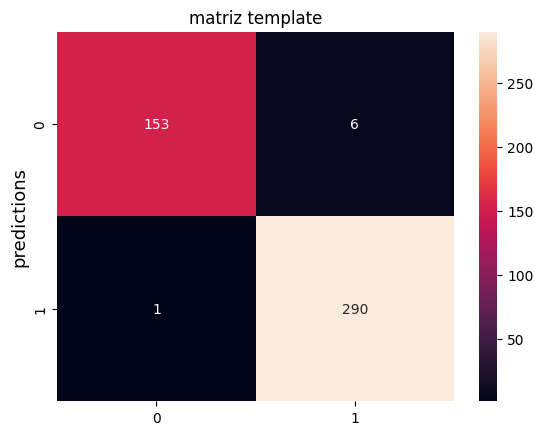

In [ ]:
#mapa de calor tiene por defecto el seaborn
sns.heatmap(cm,annot=True,fmt="g")
plt.ylabel('predictions',fontsize=13)
plt.title('matriz template')
plt.show()

In [ ]:
#los valores que importan (lo color azul son los negativos)
# true positive y true negative

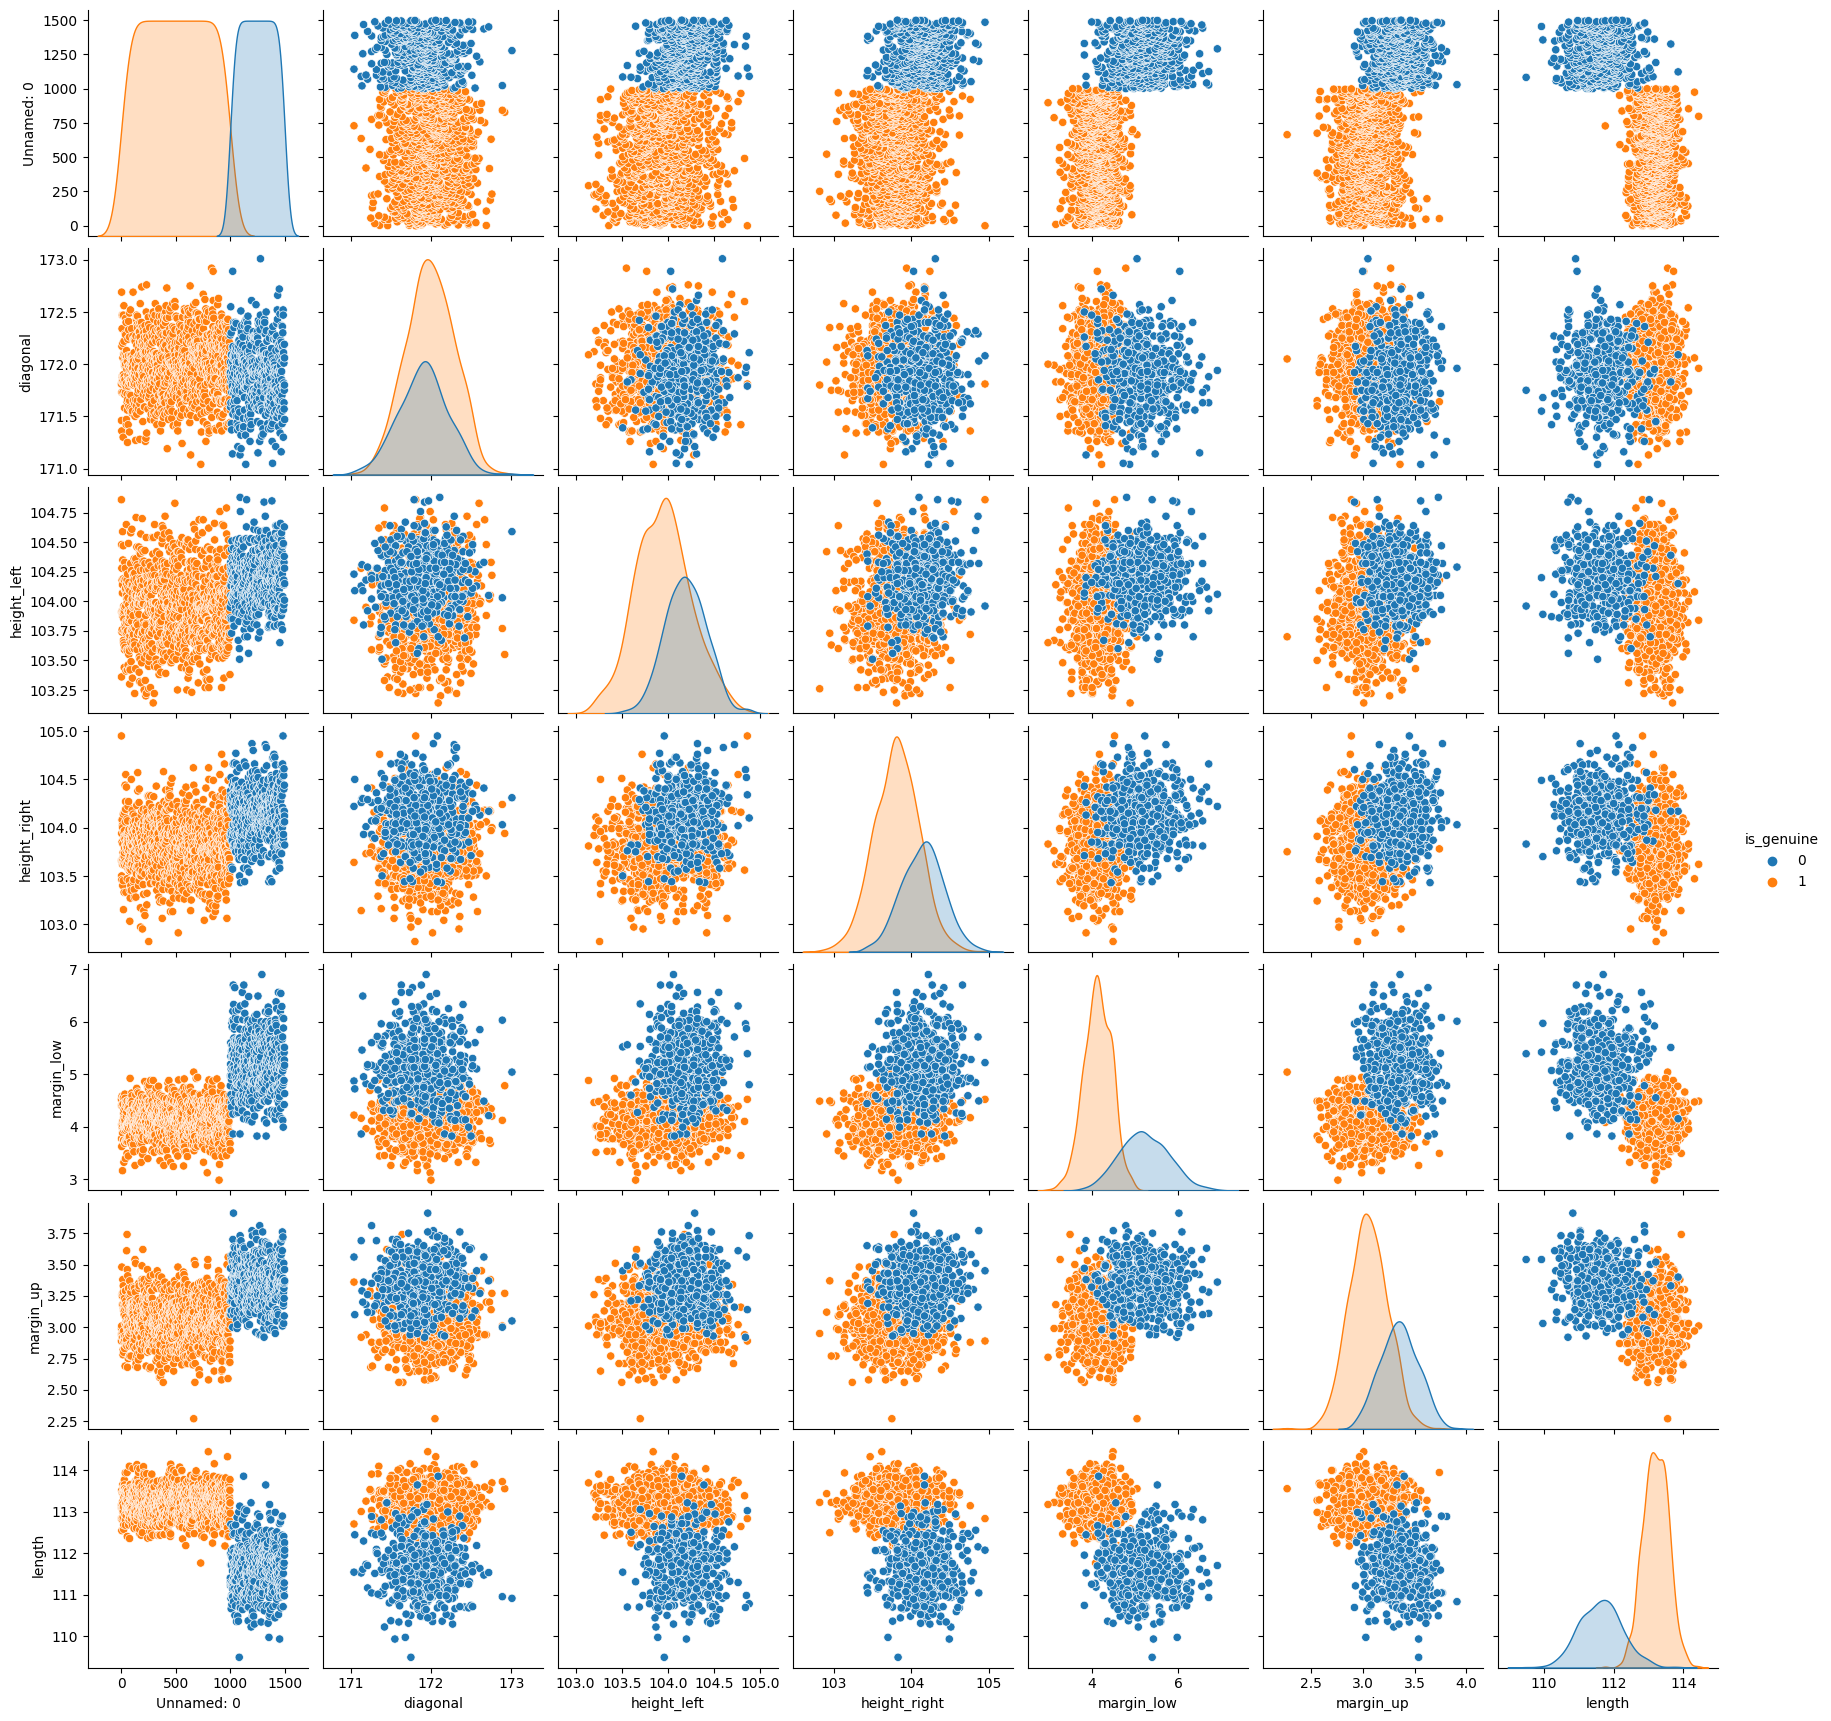

In [ ]:
sns.pairplot(bills,hue="is_genuine")